# K-Means Clustering

In [10]:
import os 
import sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.utils import shuffle 
np.random.seed(seed=0)
# Set seed so that consistency is maintained and can debug properly 

## Algo 

In [11]:
class Kmeans:
    def __init__(self, k = 5, num_of_iter = 10, dist_measure="euc"):
        self.k = k 
        self.num_of_iter = num_of_iter 
        self.centers = []
        self.clusters = {}
        self.d_measure = dist_measure 

        for i in range(k):
            self.clusters[i] = [] 
        
    def dist_measure(self, a, b):
        if self.d_measure == "euc" : 
            return np.sum((a-b)**2)

    def dist_array(self, data, centers):
        distance = np.array([[self.dist_measure(d, i) for i in centers] for d in data])
        return distance 

    def kmean_plus_plus(self, a, k):
        # using this to ensure smarter initialization of centroids 
        centers = [] 
        a = np.array(a) 
        centers.append(np.average(a, axis=0))
        for i in range(k-1):
            distance = self.dist_array(a, np.array(centers))
            if i == 0 :
                new_centroid =  a[np.random.choice(range(a.shape[0]), replace = False,)]
            else: 
                min_dist = [np.min(d) for d in distance]
                index = np.argmax(min_dist)
                new_centroid = a[index, :]
            centers.append(new_centroid.tolist())
        return centers

    def calc_clusters(self, a, y):
        clusters = {}
        for i in range(self.k):
            clusters[i] = []
        a = np.array(a) 
        for data, y in zip(a, y):
            distance = []
            for j in range(self.k):
                distance.append(self.dist_measure(data, self.centers[j])) 
            index = np.argmin(np.array(distance))
            clusters[index].append(np.append(data, np.array([index, y])))
        return clusters 

    def recalc_clusters(self):
        for i in range(self.k):
            self.centers[i] = np.average(np.array(self.clusters[i])[:,:-2], axis=0)
        return np.array(self.centers)

    def fin(self, a, y):
        self.centers = self.kmean_plus_plus(a, self.k)
        for i in range(self.num_of_iter):
            self.clusters = self.calc_clusters(a, y)
            self.centers = self.recalc_clusters()
            

In [12]:
iris = datasets.load_iris()
df_X = iris.data
df_y = np.reshape(iris.target,(len(iris.target),1))
df_X, df_y = shuffle(df_X, df_y, random_state=42)
clfd = Kmeans(k=3, num_of_iter=10)
clfd.fin(df_X, df_y)
print("Printing the cluster means")
headings = ['Index', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'] 
for h in headings:
     print(h, end="\t")
for a, i in enumerate(clfd.centers):
    print(a, end="\t")
    for j in i:
        print(round(j,2), end="\t\t")
    print("")

Printing the cluster means
Index	Sepal Length	Sepal Width	Petal Length	Petal Width	0	5.9		2.75		4.39		1.43		
1	5.01		3.43		1.46		0.25		
2	6.85		3.07		5.74		2.07		
<ipython-input-11-c301a729d23e>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  clusters[index].append(np.append(data, np.array([index, y])))


## Visualisation

In [13]:
def vis_clusters(clf, df, opt="Target"):
    ax = df[df[opt] == 0].plot.scatter(x=columns[2], y=columns[1], color='red')
    df[df[opt] == 1].plot.scatter(x=columns[2], y=columns[1], color='green', ax=ax)
    df[df[opt] == 2].plot.scatter(x=columns[2], y=columns[1], color='blue', ax=ax)
    ax.set_title(opt)

    for center in clf.centers:
        plt.plot(center[2], center[1], color='yellow', marker='X', markersize=10) 
    plt.show()

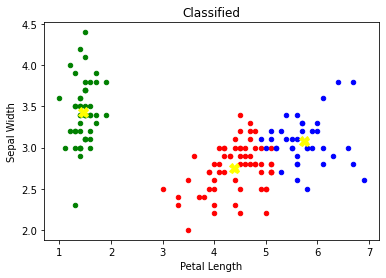

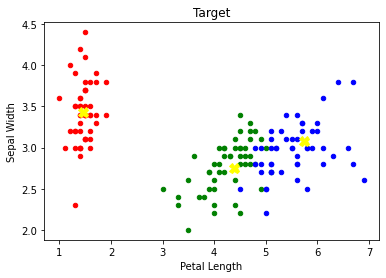

In [14]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Classified', 'Target']
df = pd.DataFrame(columns=columns)

for key,value in clf.clusters.items():
    for v in value:
        df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = v

vis_clusters(clf, df, "Classified")
vis_clusters(clf, df, "Target")